In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data source: https://www.nhtsa.gov/research-data/fatality-analysis-reporting-system-fars
# read data from Data files and put them into a list of dataframes

def readAccidentData():
    FileList = [ "FARS1975","FARS1976","FARS1977","FARS1978","FARS1979","FARS1980","FARS1981","FARS1982"
            ,"FARS1983","FARS1984","FARS1985","FARS1986","FARS1987","FARS1988","FARS1989","FARS1990"
            ,"FARS1991","FARS1992","FARS1993","FARS1994","FARS1995","FARS1996","FARS1997","FARS1998"
            ,"FARS1999","FARS2000","FARS2001","FARS2002","FARS2003","FARS2004","FARS2005","FARS2006"
            ,"FARS2007","FARS2008","FARS2009","FARS2010","FARS2011","FARS2012","FARS2013","FARS2014"
            ,"FARS2015"
           ]
    dfList = []
    for i in FileList:
        tmpfilepath = "../Data/" + i + "/accident.csv"
        print ("Reading ", tmpfilepath)
        dfList.append( pd.read_csv(tmpfilepath) )
    return dfList


dfList = readAccidentData()

Reading  ../Data/FARS1975/accident.csv
Reading  ../Data/FARS1976/accident.csv
Reading  ../Data/FARS1977/accident.csv
Reading  ../Data/FARS1978/accident.csv
Reading  ../Data/FARS1979/accident.csv
Reading  ../Data/FARS1980/accident.csv
Reading  ../Data/FARS1981/accident.csv
Reading  ../Data/FARS1982/accident.csv
Reading  ../Data/FARS1983/accident.csv
Reading  ../Data/FARS1984/accident.csv
Reading  ../Data/FARS1985/accident.csv
Reading  ../Data/FARS1986/accident.csv
Reading  ../Data/FARS1987/accident.csv
Reading  ../Data/FARS1988/accident.csv
Reading  ../Data/FARS1989/accident.csv
Reading  ../Data/FARS1990/accident.csv
Reading  ../Data/FARS1991/accident.csv
Reading  ../Data/FARS1992/accident.csv
Reading  ../Data/FARS1993/accident.csv
Reading  ../Data/FARS1994/accident.csv
Reading  ../Data/FARS1995/accident.csv
Reading  ../Data/FARS1996/accident.csv
Reading  ../Data/FARS1997/accident.csv
Reading  ../Data/FARS1998/accident.csv
Reading  ../Data/FARS1999/accident.csv
Reading  ../Data/FARS2000

In [17]:
def readPopData():
    # data source: https://seer.cancer.gov/popdata/download.html#19
    filename = "../Data/us.1969_2015.19ages.txt"
    print ("Reading ",filename)
    f = open(filename,"r")
    L = f.read()
    L=L.split()
    
    # extract only year, county, and population information
    year = []
    county = []
    population = []
    for x in L:
        year.append(x[:4])
        county.append( x[6:11] )
        population.append(x[18:])
    myDf = pd.DataFrame({"Year" : year, "CountyCode":county,"Population":population})
    return myDf

def cleanPopData(df_raw):
    
    
    
myDf_RawPopulationData = readPopData()
myDf_PopulationData = cleanPopData(myDf_RawPopulationData)

Reading  ../Data/us.1969_2015.19ages.txt


In [19]:
myDf_PopulationData

,CountyCode,Population,Year
0,01001,00000159,1969
1,01001,00000657,1969
2,01001,00001137,1969
3,01001,00000956,1969
4,01001,00000721,1969
5,01001,00000424,1969
6,01001,00000585,1969
7,01001,00000637,1969
8,01001,00000607,1969
9,01001,00000523,1969


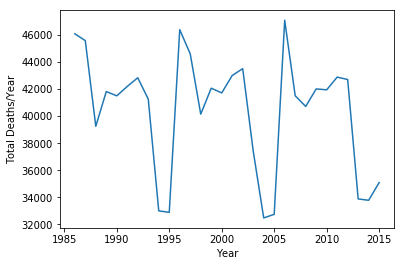

In [8]:
# get number of deaths from traffic accidents and year information
def getFatalList(dfList):
    FatalList = []
    YearList = []
    for i in range(len(dfList)):
        FatalList.append( dfList[i]["FATALS"].sum()  )
        YearList.append( i+1986 )
    return YearList,FatalList

yearList, fatalList = getFatalList(dfList)
# print(yearList,fatalList)
# plot total deaths vs year
plt.plot(yearList, fatalList)
plt.xlabel('Year')
plt.ylabel('Total Deaths/Year')
plt.show()

In [9]:
# 
# This part is to show deaths per county
#

# get the county codes, explanation: https://en.wikipedia.org/wiki/FIPS_county_code
def addcountyCode(dfList):
    for i in range(len(dfList)):
        dfList[i]['STATE'] = dfList[i]['STATE'].apply(lambda x: int(x))
        dfList[i]['STATE'] = dfList[i]['STATE'].apply(lambda x: '{0:0>2}'.format(x))
        dfList[i]['COUNTY'] = dfList[i]['COUNTY'].apply(lambda x: int(x))
        dfList[i]["COUNTY"] = dfList[i]["COUNTY"].apply(lambda x: '{0:0>3}'.format(x))
        dfList[i]["COUNTYCODE"] = dfList[i]["STATE"].astype(str)+dfList[i]["COUNTY"].astype(str)
        #print (dfList[i]['COUNTYCODE'])
    return dfList


# add deaths for each county
def groupbyCounty(dfList):
    groupeddfList = []
    for i in range(len(dfList)):
        tmp = dfList[i]["FATALS"].groupby(dfList[i]["COUNTYCODE"]).count()
        tmp2df = tmp.to_frame()
        tmp2df.reset_index(inplace=True)
        groupeddfList.append(tmp2df)
    return groupeddfList

# merge county and death informations from 1986 to 2015
def mergeDfList(groupeddfList):
    tmp = pd.DataFrame()
    for i in range(len(groupeddfList)-1):
        if (i==0): 
            tmp = pd.merge(groupeddfList[0],groupeddfList[1],on='COUNTYCODE',how="outer").set_index(["COUNTYCODE"]).sum(axis=1)
            tmp = tmp.to_frame()
            tmp.columns = ["FATALS"]
            tmp.reset_index(inplace=True)
        tmp = pd.merge(tmp,groupeddfList[i+1],on='COUNTYCODE',how="outer").set_index(["COUNTYCODE"]).sum(axis=1)
        tmp = tmp.to_frame()
        tmp.columns = ["FATALS"]
        tmp.reset_index(inplace=True) 
    return tmp
    
dfList = addcountyCode(dfList)
dfList[1].to_csv("test.csv",index=False)
groupeddfList = groupbyCounty(dfList)
mergedDf = mergeDfList(groupeddfList)
mergedDf = mergedDf[mergedDf.COUNTYCODE.str[-3:] != "000"] # drop state info

# save them to a csv file
# mergedDf.to_csv('MergedCountyFatality.csv', index=False)


In [1]:
def readPopData():
    tmp = pd.read_excel("../Data/POPULATION_BY_COUNTY.xls")
    # df = pd.concat(tmp["STCOU"],tmp["POP010210D"])
    df = tmp[['STCOU', 'POP010210D']].copy()
    return df
dfPop = readPopData()
dfPop['STCOU'] = dfPop['STCOU'].apply(lambda x: '{0:0>5}'.format(x))
dfPop = dfPop.rename(index=str, columns={"STCOU": "COUNTYCODE", "POP010210D":"2010POPULATION"})
df = pd.merge(mergedDf, dfPop, on='COUNTYCODE', how='inner')
#print()
totalUSpop = df["2010POPULATION"].sum()
print (totalUSpop)
# df["AdjustedFatalities"] = df["FATALS"]*totalUSpop/df["2010POPULATION"]
df["AdjustedFatalities"] = 1000*df["FATALS"]/df["2010POPULATION"]
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["AdjustedFatalities"], how="all")
# df["AdjustedNormalizedFatalities"] = (df["AdjustedFatalities"] - df["AdjustedFatalities"].mean())/ (df["AdjustedFatalities"].max() - df["AdjustedFatalities"].min())

print (df["AdjustedFatalities"].sum())
df.to_csv('FatalitybyCountyAdjustedwithPopulation.csv', index=False, header = False)
df

NameError: name 'pd' is not defined